In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv
/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarro

# Step 1: Ask

### Background

Bellabeat, founded in 2013 by Urška Sršen and Sando Mur, is a pioneering high-tech company that specializes in manufacturing health-focused smart products for women. Leveraging Sršen's artistic background, Bellabeat has successfully crafted elegantly designed technology to empower and inspire women globally. The company's products encompass a range of devices and a comprehensive app that provide users with insightful health data related to their activity, sleep, stress, menstrual cycle, mindfulness habits, and hydration levels. By amalgamating technology with wellness, Bellabeat is committed to enhancing the well-being of women and helping them make informed and healthy decisions about their lifestyles.

### Key Stakeholders

In this data analysis venture, the key stakeholders involved are pivotal to the success of our insights and recommendations:

1. **Urška Sršen (Co-founder and Chief Creative Officer):** As a co-founder and Chief Creative Officer of Bellabeat, Urška Sršen's vision and direction steer the company's creative and strategic initiatives. She plays a vital role in defining the brand's identity and positioning in the market.

2. **Sando Mur (Co-founder and Mathematician):** Another co-founder, Sando Mur, contributes with his mathematical expertise, aiding in the formulation of data-driven strategies and decisions. As a key member of the executive team, his insights significantly influence the company's directions.

3. **Bellabeat Marketing Analytics Team:** The data analysts in this team, including yourself, are responsible for collecting, analyzing, and reporting data that drives Bellabeat's marketing strategy. Your expertise is instrumental in interpreting the data and formulating recommendations that align with the company's objectives.

### Business Task

The primary objective of this analysis is to delve into smart device usage data, gaining valuable insights into how consumers interact with non-Bellabeat smart devices. The ultimate goal is to apply these insights to one specific Bellabeat product and derive high-level content recommendations that can profoundly influence Bellabeat's marketing strategy. To accomplish this, we will answer the following questions:

1. **Trends in Smart Device Usage:**
   What are the prevailing trends in how users engage with non-Bellabeat smart devices? Understanding these trends will shed light on consumer behaviors and expectations.

2. **Application to Bellabeat Customers:**
   How can we relate these broader smart device usage trends to the Bellabeat customer base? This step is crucial in tailoring our marketing strategies effectively.

3. **Influence on Bellabeat Marketing Strategy:**
   How can these identified trends help reshape and optimize Bellabeat's marketing strategy for the chosen product? Our recommendations will aim to align the strategy with the identified consumer patterns, maximizing impact and engagement.

These aspects will guide our analytical journey, ensuring that we derive meaningful insights and actionable recommendations that propel Bellabeat towards growth and success in the competitive wellness technology market.


# Step 2: Prepare

### About Dataset

The dataset used in this analysis was generated through responses obtained from a distributed survey conducted via Amazon Mechanical Turk during the period between 03.12.2016-05.12.2016. Thirty eligible Fitbit users provided their consent for the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. Individual reports within the dataset can be parsed using either the export session ID (column A) or timestamp (column B). The variation in output represents the use of different types of Fitbit trackers and individual tracking behaviors/preferences.

#### Accessibility and Privacy of Data

The data is licensed under CC0: Public Domain, waiving all rights of the contributor worldwide under copyright law, including related and neighboring rights, to the extent possible by law. The data can be copied, modified, distributed, and performed, even for commercial purposes, all without requiring permission.

#### Data Organization and Verification

The dataset comprises 18 .csv files, 15 in long format and 3 in wide format. It contains a diverse range of information, including activity metrics, calories, sleep records, metabolic equivalent of tasks (METs), heart rate, and steps. The data is recorded at different timeframes, ranging from seconds, minutes, hours to days.

### Data Limitations

It is important to acknowledge certain limitations of the dataset that may impact the analysis results. These limitations include:

- **Missing Demographics:** The dataset may lack crucial demographic information, which could affect the interpretation of results in certain contexts.
  
- **Small Sample Size:** The dataset represents a relatively small sample size, which might limit the generalizability of findings to a broader population.
  
- **Short Time Period of Data Collection:** The data collection was conducted over a limited time period. This short timeframe might not provide a complete picture of long-term trends or patterns.



# Step 3: Process



In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#pd.set_option('display.max_rows')

In [3]:
# Prepare the data
df = pd.read_csv('/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv')

In [4]:
df.shape

(940, 15)

In [5]:
df.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')

In [6]:
df.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863
5,1503960366,4/17/2016,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728
6,1503960366,4/18/2016,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921
7,1503960366,4/19/2016,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035
8,1503960366,4/20/2016,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786
9,1503960366,4/21/2016,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775


In [7]:
df.dtypes

Id                            int64
ActivityDate                 object
TotalSteps                    int64
TotalDistance               float64
TrackerDistance             float64
LoggedActivitiesDistance    float64
VeryActiveDistance          float64
ModeratelyActiveDistance    float64
LightActiveDistance         float64
SedentaryActiveDistance     float64
VeryActiveMinutes             int64
FairlyActiveMinutes           int64
LightlyActiveMinutes          int64
SedentaryMinutes              int64
Calories                      int64
dtype: object

In [8]:
# Clean the data
df['Id'] =  df['Id'].astype(str) 
df['ActivityDate'] = pd.to_datetime(df['ActivityDate'], format = '%m/%d/%Y') 
df.dtypes

Id                                  object
ActivityDate                datetime64[ns]
TotalSteps                           int64
TotalDistance                      float64
TrackerDistance                    float64
LoggedActivitiesDistance           float64
VeryActiveDistance                 float64
ModeratelyActiveDistance           float64
LightActiveDistance                float64
SedentaryActiveDistance            float64
VeryActiveMinutes                    int64
FairlyActiveMinutes                  int64
LightlyActiveMinutes                 int64
SedentaryMinutes                     int64
Calories                             int64
dtype: object

In [9]:
# Checking column values
df['distance_diff'] = df['TotalDistance'] - df['TrackerDistance']
df['distance_diff'].value_counts()

distance_diff
0.000000    925
1.830000      1
0.190001      1
0.040000      1
0.810000      1
1.049999      1
0.760000      1
1.070000      1
0.980000      1
0.900001      1
1.140000      1
1.160000      1
0.880000      1
0.460000      1
1.160000      1
1.060000      1
Name: count, dtype: int64

In [10]:
df.query('distance_diff > 0.0')

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,distance_diff
689,6962181067,2016-04-21,11835,9.71,7.88,4.081692,3.99,2.10,3.51,0.11,53,27,214,708,2179,1.830000
693,6962181067,2016-04-25,13239,9.27,9.08,2.785175,3.02,1.68,4.46,0.10,35,31,282,637,2194,0.190001
707,6962181067,2016-05-09,12342,8.72,8.68,3.167822,3.90,1.18,3.65,0.00,43,21,231,607,2105,0.040000
711,7007744171,2016-04-12,14172,10.29,9.48,4.869783,4.50,0.38,5.41,0.00,53,8,355,1024,2937,0.810000
712,7007744171,2016-04-13,12862,9.65,8.60,4.851307,4.61,0.56,4.48,0.00,56,22,261,1101,2742,1.049999
713,7007744171,2016-04-14,11179,8.24,7.48,3.285415,2.95,0.34,4.96,0.00,34,6,304,1096,2668,0.760000
717,7007744171,2016-04-18,14816,10.98,9.91,4.930550,3.79,2.12,5.05,0.02,48,31,284,1077,2832,1.070000
718,7007744171,2016-04-19,14194,10.48,9.50,4.942142,4.41,0.76,5.31,0.00,53,17,304,1066,2812,0.980000
719,7007744171,2016-04-20,15566,11.31,10.41,4.924841,4.79,0.67,5.86,0.00,60,33,347,1000,3096,0.900001
724,7007744171,2016-04-25,18229,13.34,12.20,4.861792,4.31,1.37,7.67,0.00,51,24,379,986,3055,1.140000


In [11]:
# Renaming columns
df.columns = df.columns.str.lower()
df.rename(columns = {'trackerdistance':'tracker_distance','activitydate':'activity_date','totalsteps':'total_steps','totaldistance':'total_distance',
       'loggedactivitiesdistance':'logged_activities_distance', 'veryactivedistance':'very_active_distance',
       'moderatelyactivedistance':'moderately_active_distance', 'lightactivedistance':'light_active_distance',
       'sedentaryactivedistance':'sedentary_active_distance', 'veryactiveminutes':'very_active_minutes',
       'fairlyactiveminutes':'fairly_active_minutes','lightlyactiveminutes':'lightly_active_minutes',
       'sedentaryminutes':'sedentary_minutes'}
         ,inplace=True) #make the changes permanent by using inplace=True

In [12]:
# Creating columns
day_of_week = df['activity_date'].dt.day_name()
df['day_of_week'] = day_of_week
df['n_day_of_week'] = df['activity_date'].dt.weekday # 0 represents monday, 6 represents sunday

In [13]:
# Checking empty cells and null values
df.isna().sum()

id                            0
activity_date                 0
total_steps                   0
total_distance                0
tracker_distance              0
logged_activities_distance    0
very_active_distance          0
moderately_active_distance    0
light_active_distance         0
sedentary_active_distance     0
very_active_minutes           0
fairly_active_minutes         0
lightly_active_minutes        0
sedentary_minutes             0
calories                      0
distance_diff                 0
day_of_week                   0
n_day_of_week                 0
dtype: int64

In [14]:
# Checking for duplicates
df.duplicated().sum()

0

# Step 4: Analyze

In [15]:
# Subsetting the data
df = df[['id', 'activity_date', 'total_steps', 'total_distance',
       #'tracker_distance', 'logged_activities_distance',
       #'very_active_distance', 'moderately_active_distance',
       #'light_active_distance', 'sedentary_active_distance',
       'very_active_minutes', 'fairly_active_minutes',
       'lightly_active_minutes', 'sedentary_minutes', 'calories',
       #'sum_distance','totalminutes', 
       'day_of_week', 'n_day_of_week'
        ]].copy()

**Category creation**

Here, I categorized users based on the level of physical activity and device usage

Physical activity would follow these arguments:
- Low: less than 4000 steps per day on average
- Somewhat active: between 4000 and 7500 steps per day on average
- Active: between 7500 and 11500 steps per day on average
- Very active: more than 11500 steps per day on average

Device usage will follow these arguments:
- Low use: less than 8 hours of use per day.
- Normal use: between 8 and 16 hours of use per day.
- High use: more than 16 hours of use per day.

In [16]:
# Grouping the data by the id
id_grp = df.groupby(['id'])

# Looking for the average amount of steps, and sort the results in descending order
id_avg_step = id_grp['total_steps'].mean().sort_values(ascending=False)

# After that, I turn the results into a dataframe
id_avg_step = id_avg_step.to_frame()

# Creating a new column which tells in which category each user fits into, depending on the average amount of steps
conditions = [
    (id_avg_step <=4000),
    (id_avg_step > 4000) & (id_avg_step <= 7500),
    (id_avg_step > 7500) & (id_avg_step <= 11500),
    (id_avg_step > 11500)
] 

values = ['low','somewhat_active','active','very_active'] # the name of the values

# Creating a column with the numpy function, np.select to asign each id a category
id_avg_step['activity_level'] = np.select(conditions,values)

# Storing the results in a variable to use it in the next step
id_activity_level = id_avg_step['activity_level']

# Using a list comprehension to create the column in the original dataset.
# With this list comprehension I retrieve the categories where the index match the id column
df['activity_level'] = [id_activity_level[c] for c in df['id']]

# Step 5: Share

**Correlation between calories steps and calories**

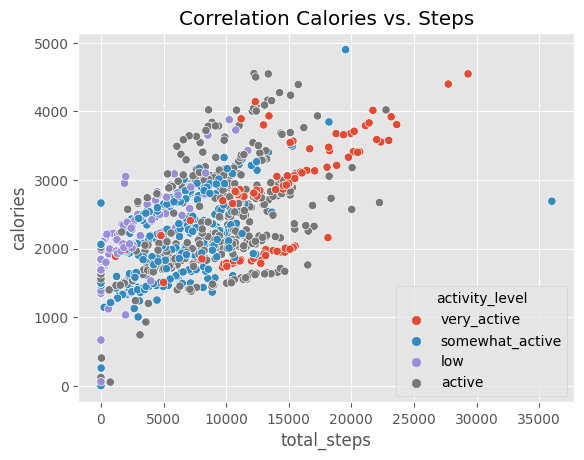

In [17]:

ax =sns.scatterplot(x='total_steps', y='calories', data=df,hue='activity_level')

#handles, labels = ax.get_legend_handles_labels()
#plt.legend(handles, day_of_week, fontsize=7)
plt.title('Correlation Calories vs. Steps')

plt.show()

In this scatterplot, we observe a positive correlation, where an increase in the number of steps corresponds to a higher calorie expenditure. Additionally, we categorized the data points by activity_level, allowing for a clearer representation of different groups and their respective data.

**Average number of steps per day**

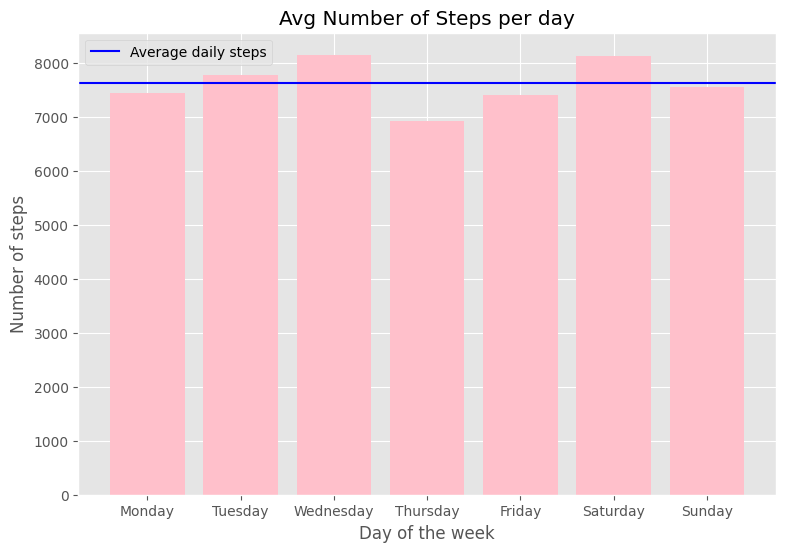

In [18]:
day_of_week = ['Monday','Tuesday','Wednesday','Thursday', 'Friday','Saturday','Sunday']
fig, ax =plt.subplots(1,1,figsize=(9,6))

day_grp = df.groupby(['day_of_week'])
avg_daily_steps= day_grp['total_steps'].mean()
avg_steps = df['total_steps'].mean()

plt.bar(avg_daily_steps.index,avg_daily_steps, color = 'pink')

ax.set_xticks(range(len(day_of_week)))
ax.set_xticklabels(day_of_week)

ax.axhline(y=avg_daily_steps.mean(),color='blue', label='Average daily steps')
ax.set_ylabel('Number of steps')
ax.set_xlabel('Day of the week')
ax.set_title('Avg Number of Steps per day')

plt.legend()
plt.show()

The findings reveal Tuesday, Wednesday and Saturday exhibit higher physical activity levels, surpassing the overall average number of steps. On the other hand, Monday,Friday, and Sunday demonstrate activity levels below the average, yet they fall within a similar range. Notably, Thursday ranks as the least active among the weekdays.


**Percentage of activity in minutes**

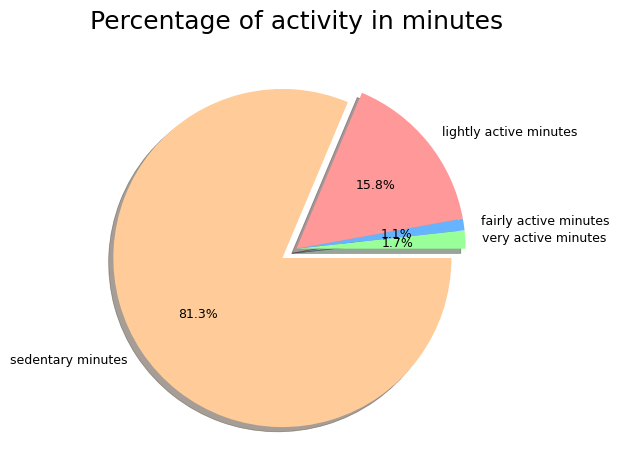

In [19]:
very_active_mins = df['very_active_minutes'].sum() 
fairly_active_mins = df['fairly_active_minutes'].sum()
lightly_active_mins = df['lightly_active_minutes'].sum()
sedentary_mins = df['sedentary_minutes'].sum()

slices = [very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins]
labels = ['very active minutes','fairly active minutes','lightly active minutes','sedentary minutes']
explode = [0,0,0,0.1]
colors = ['#99ff99','#66b3ff','#ff9999','#ffcc99']
plt.pie(slices, labels = labels, colors=colors, explode = explode, autopct='%1.1f%%',textprops=dict(size=9), shadow=True)

plt.title('Percentage of activity in minutes',fontsize=18)
plt.tight_layout()

plt.show()

The pie chart illustrates that the majority of users are primarily sedentary, dedicating a small portion of their time to light activity. Furthermore, nearly 2% of their time is spent engaging in vigorous exercise.

**Correlation Between Activity level minutes and Calories**

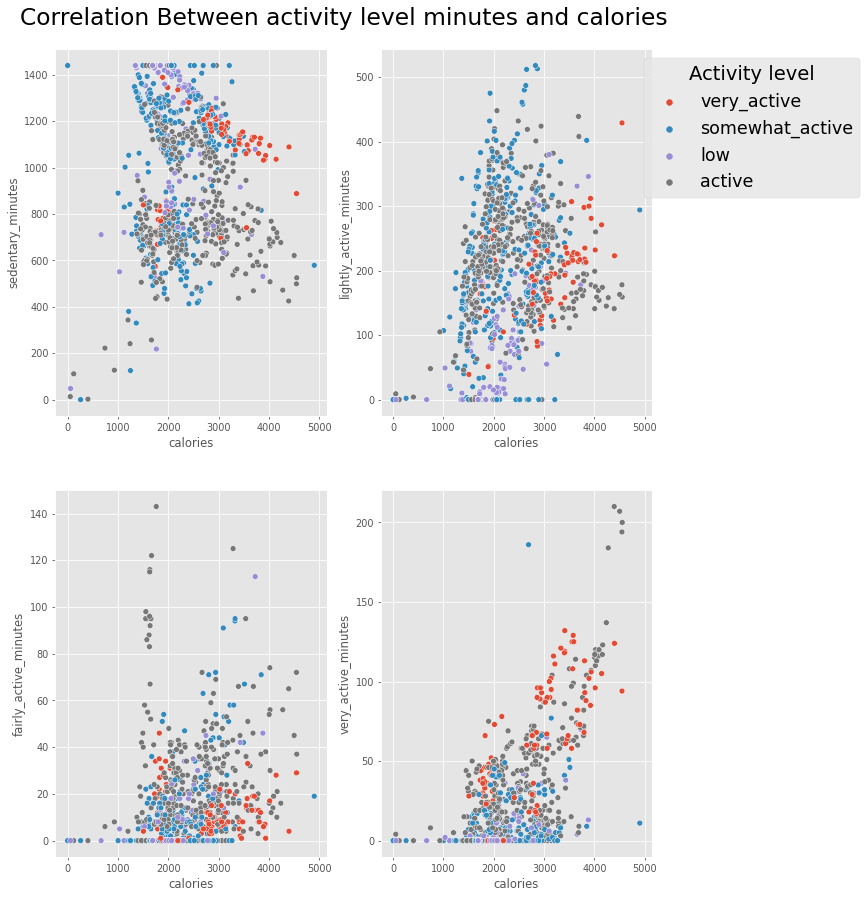

In [20]:
n_day_of_week = [0,1,2,3,4,5,6]

fig, axes = plt.subplots(nrows=2, ncols=2,figsize=(11,15),dpi=70)

sns.scatterplot(data=df,x='calories',y='sedentary_minutes',hue='activity_level',ax=axes[0,0],legend=False)

sns.scatterplot(data=df,x='calories',y='lightly_active_minutes',hue='activity_level',ax=axes[0,1],legend=False)

sns.scatterplot(data=df,x='calories',y='fairly_active_minutes',hue='activity_level',ax=axes[1,0],legend=False)

sns.scatterplot(data=df,x='calories',y='very_active_minutes',hue='activity_level',ax=axes[1,1])


plt.legend(title='Activity level',title_fontsize=20,bbox_to_anchor=(1.8,2.2),fontsize=18,frameon=True,scatterpoints=1)
fig.suptitle('Correlation Between activity level minutes and calories',x=0.5,y=0.92,fontsize=24)
plt.show()

# Step 6: Act

Now that we have delved into the data and uncovered valuable insights, it's time to set the wheels in motion and take decisive action to steer Bellabeat towards a promising future.

**1. Enhancing Product Positioning for Versatility:**

Based on our analysis, we recognize the need to redefine how Bellabeat products are perceived. It's crucial to emphasize that these products are not confined to sports or leisure activities alone. Instead, they seamlessly integrate into users' daily lives, accompanying them throughout a spectrum of activities, including work. By highlighting their ability to track vital health information and improve overall fitness, we can broaden the appeal, capturing a diverse audience of health-conscious women. This strategy aligns with Bellabeat's mission of empowering women with knowledge about their health and well-being.

    Next Steps:
- Update marketing materials to showcase versatility.
- Launch targeted campaigns showcasing real-life usage scenarios.
- Leverage social media to convey this new perspective effectively.

**2. Gamifying User Experience for Enhanced Engagement:**

Our data analysis reveals the potential for integrating gamified elements into the Bellabeat app and products. Rewards, incentives, and reminders can be powerful motivators for users to achieve specific daily goals related to steps, calorie burning, hydration, and more. These gamified features will not only boost user engagement but also encourage a sustained commitment to a healthier lifestyle. The concept of a leaderboard, virtual medals, and attractive prizes creates a sense of competition and accomplishment, further enhancing the user experience.

    Next Steps:
- Prioritize the integration of gamified features within the Bellabeat app.
- Develop a comprehensive rewards and incentives system.
- Implement a feedback loop to gather insights on the effectiveness of gamification elements.

**3. Feedback Integration and Continuous Improvement:**

Establishing a robust feedback mechanism is imperative to understand user preferences, identify areas for improvement, and stay agile in responding to evolving needs. By actively seeking and incorporating user feedback, we can refine marketing strategies and product features. This iterative approach ensures that Bellabeat's offerings align with consumer expectations, fostering long-term user satisfaction and brand loyalty.

    Next Steps:
- Implement a user feedback collection system.
- Analyze feedback to identify patterns and areas for enhancement.
- Iterate marketing strategies and product features based on feedback insights.


With these action steps in motion, we aim to propel Bellabeat towards sustained growth and success in the dynamic wellness technology market. The journey to a more empowered and healthier future for women is just beginning.